<h2>Домашнее задание по курсу "Методы машинного обучения"</h2>
<p><b>Вариант:</b> 1</p>
<p><b>Выполнил:</b> Арбузов А.П. группа ИУ5-24М</p>

<h3>Задание</h3>
<ol>
    <li>Поиск и выбор набора данных для построения модели машинного обучения. На основе выбранного набора данных строится модель машинного обучения для решения или задачи классификации, или задачи регрессии.</li>
        <li>Для выбранного датасета (датасетов) на основе материалов лекций, в целях улучшения выборки, решить следующие задачи (если это необходимо в данном датасете):
        <ul>
            <li>устранение пропусков в данных;</li>
            <li>кодирование категориальных признаков;</li>
            <li>нормализацию числовых признаков;</li>
            <li>масштабирование признаков;</li>
            <li>обработку выбросов для числовых признаков;</li>
            <li>обработку нестандартных признаков (которые не является числовым или категориальным);</li>
            <li>отбор признаков, наиболее подходящих для построения модели;</li>
            <li>устранение дисбаланса классов в случае решения задачи классификации на дисбалансированной выборке.</li>
        </ul>
    </li>
    <li>Обучить модель и оценить метрики качества для двух выборок :
        <ul>
            <li>исходная выборка, которая содержит только минимальную предобработку данных, необходимую для построения модели (например, кодирование категориальных признаков).</li>
            <li>улучшенная выборка, полученная в результате полной предобработки данных в пункте 2.</li>
        </ul>
    </li>
    <li>Построить модель с использованием произвольной библиотеки AutoML.</li>
    <li>Сравнить метрики для трех полученных моделей.</li>
</ol>

In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

from sklearn.feature_selection import mutual_info_classif, chi2, f_classif
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import r2_score, mean_absolute_error, explained_variance_score

import warnings
warnings.filterwarnings('ignore')

Возьмём выборку на основе клиентов торгового центра

In [4]:
data = pd.read_csv('Mall_Customers.csv', sep = ",")
data.head(50)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


Расшифровка названий полей датасета.
CustomerID - индивидуальный номер клиента
Gender - пол
Age - Возраст
Annual Income (k$) - Годовой доход (тыс. долл)
Spending Score (1-100) - Оценка Расходов (1-100)

# Проверка наличия пустых ячеек.

In [5]:
def EmptyReport(ScanData):
    ScanData.isnull().sum()
    DataSize = ScanData.shape
    AttributesNames = []
    EmptyData = []
    EmptyDataPercent = []
    for  i in ScanData:
        AttributesNames.append(i)
        EmptyData.append(ScanData[i].isnull().sum())
        EmptyDataPercent.append(round(ScanData[i].isnull().sum()/DataSize[0]*100,4))
    EmptyData = pd.DataFrame({'Attributes Names':AttributesNames, 
                             'Empty Data':EmptyData, 
                             'Empty Data (%)':EmptyDataPercent})
    return EmptyData

In [6]:
EmptyReport(data)

,Attributes Names,Empty Data,Empty Data (%)
0,CustomerID,0,0.0
1,Gender,0,0.0
2,Age,0,0.0
3,Annual Income (k$),0,0.0
4,Spending Score (1-100),0,0.0


Пустых ячеек не обнаружено

# Кодирование категориальных признаков.

In [7]:
data.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

Как видно из вывода функции dtypes не все объекты являются числовыми, а, следовательно, требуют кодирования. Полем не числового типа оказалось поле ПОЛ (Gender). Перекодируем его:

In [8]:
data['Gender'] = data['Gender'].map({'Female': 0, 
                                       'Male': 1}) 

In [9]:
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder() 
label_encoder.fit(data['Gender']) 
label_encoder.transform(data['Gender']) 

array([1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1], dtype=int64)

In [10]:
data.dtypes

CustomerID                int64
Gender                    int64
Age                       int64
Annual Income (k$)        int64
Spending Score (1-100)    int64
dtype: object

In [11]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


# Отбор признаков 

Произведём отбор признаков методами на основе корреляционного анализа:

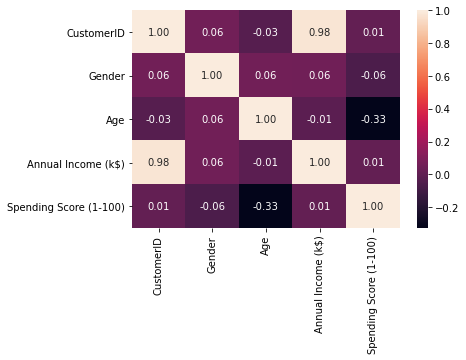

In [14]:
sns.heatmap(data.corr(method='pearson'), annot=True, fmt='.2f')
ax[0].title.set_text('Корреляция Пирсона')

Отбор методом корреляции не дал результатов

<AxesSubplot:>

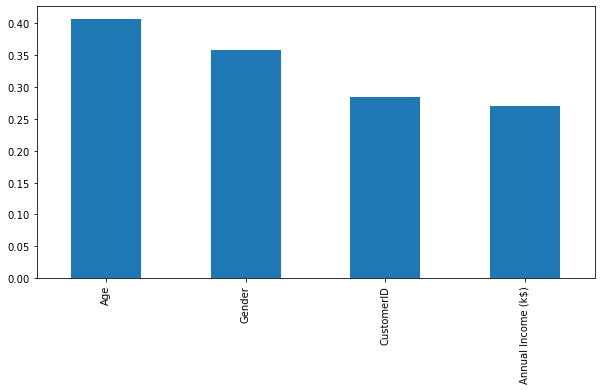

In [20]:
mi = mutual_info_classif(data.drop(columns=['Spending Score (1-100)']), data['Spending Score (1-100)'])
mi = pd.Series(mi)
mi.index = data.drop(columns=['Spending Score (1-100)']).columns
mi.sort_values(ascending=False).plot.bar(figsize=(10,5))

<AxesSubplot:>

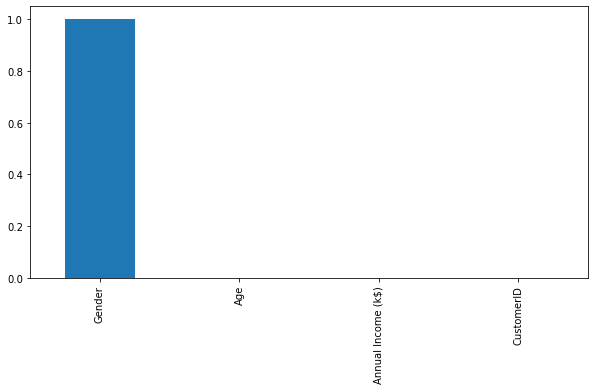

In [21]:
mi = chi2(data.drop(columns=['Spending Score (1-100)']), data['Spending Score (1-100)'])[1]
mi = pd.Series(mi)
mi.index = data.drop(columns=['Spending Score (1-100)']).columns
mi.sort_values(ascending=False).plot.bar(figsize=(10,5))

<AxesSubplot:>

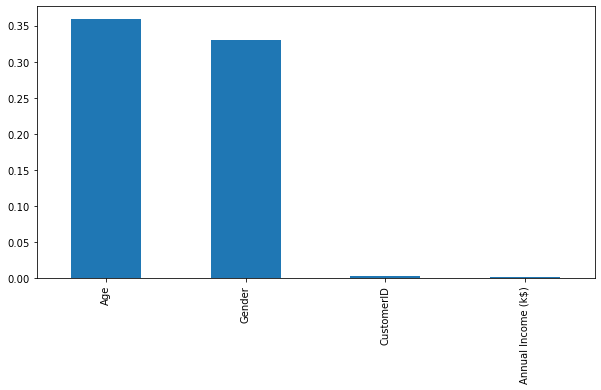

In [22]:
mi = f_classif(data.drop(columns=['Spending Score (1-100)']), data['Spending Score (1-100)'])[1]
mi = pd.Series(mi)
mi.index = data.drop(columns=['Spending Score (1-100)']).columns
mi.sort_values(ascending=False).plot.bar(figsize=(10,5))

Отбор методом, основанным на статистических характеристиках выдал признаки age и gender.

In [40]:
selectedFeatures = ['Age', 'Gender']
def featureSelector(featuerInfo, lim):
    for ind in featuerInfo.index:
        if fi[ind] > lim:
            selectedFeatures.append(ind)

Попробуем теперь применить метод вложений отбора признаков

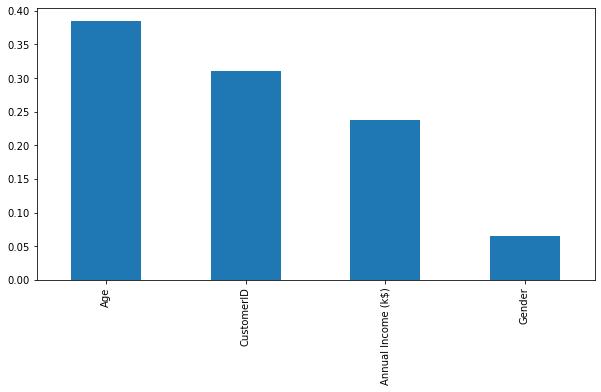

In [41]:
dtc = DecisionTreeClassifier()
dtc.fit(data.drop(columns=['Spending Score (1-100)']), data['Spending Score (1-100)'])
fi = dtc.feature_importances_
fi = pd.Series(fi)
fi.index = data.drop(columns=['Spending Score (1-100)']).columns
fi.sort_values(ascending=False).plot.bar(figsize=(10,5))
featureSelector(fi, 0.3)

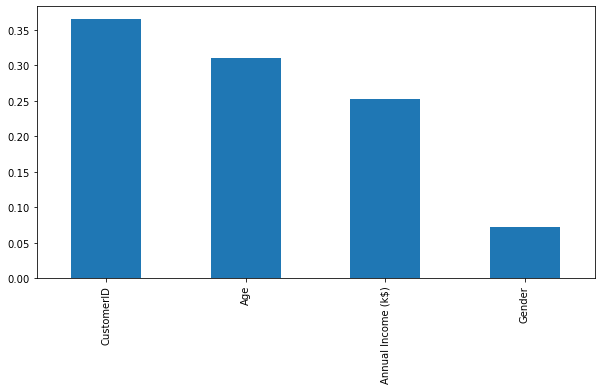

In [42]:
rfc = RandomForestClassifier()
rfc.fit(data.drop(columns=['Spending Score (1-100)']), data['Spending Score (1-100)'])
fi = rfc.feature_importances_
fi = pd.Series(fi)
fi.index = data.drop(columns=['Spending Score (1-100)']).columns
fi.sort_values(ascending=False).plot.bar(figsize=(10,5))
featureSelector(fi, 0.3)

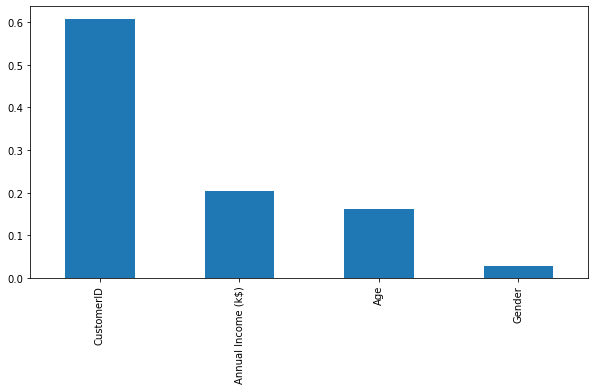

In [43]:
gbc = GradientBoostingClassifier()
gbc.fit(data.drop(columns=['Spending Score (1-100)']), data['Spending Score (1-100)'])
fi = gbc.feature_importances_
fi = pd.Series(fi)
fi.index = data.drop(columns=['Spending Score (1-100)']).columns
fi.sort_values(ascending=False).plot.bar(figsize=(10,5))
featureSelector(fi, 0.3)

In [44]:
selectedFeatures = list(set(selectedFeatures))
selectedFeatures

['Gender', 'Age', 'CustomerID']

<h3>Обучение моделей</h3> 

In [57]:
models = {
    'KNN': KNeighborsRegressor,
    'LS':  Lasso,
    'DTR': DecisionTreeRegressor,
    'RFR': RandomForestRegressor,
    'GBR': GradientBoostingRegressor
    
}
xTrain, xTest, yTrain, yTest =  train_test_split(data.drop(columns=['Spending Score (1-100)']), data['Spending Score (1-100)'], test_size=0.3, random_state = 1)

In [58]:
report = []
for modelName, model in models.items():
    tmp = [modelName + '_all',]
    currModel = model()
    currModel.fit(xTrain, yTrain)
    yPred = currModel.predict(xTest)
    tmp.append(r2_score(yTest, yPred))
    tmp.append(mean_absolute_error(yTest, yPred))
    tmp.append(explained_variance_score(yTest, yPred))
    report.append(tmp)

In [59]:
xTrain, xTest, yTrain, yTest =  train_test_split(data[selectedFeatures], data['Spending Score (1-100)'], test_size=0.3, random_state = 1)

In [60]:
for modelName, model in models.items():
    tmp = [modelName + '_sel',]
    currModel = model()
    currModel.fit(xTrain, yTrain)
    yPred = currModel.predict(xTest)
    tmp.append(r2_score(yTest, yPred))
    tmp.append(mean_absolute_error(yTest, yPred))
    tmp.append(explained_variance_score(yTest, yPred))
    report.append(tmp)

In [61]:
dfReport = pd.DataFrame(report, columns=['Model','R2','MAE','EVS'])
dfReport = dfReport.sort_values(by=['Model'])
dfReport.head(10)

,Model,R2,MAE,EVS
7,DTR_all,-0.026561,17.700000,-0.020401
2,DTR_sel,0.024875,16.800000,0.027838
9,GBR_all,0.209565,16.987254,0.209721
4,GBR_sel,0.244580,16.527872,0.244619
5,KNN_all,0.199948,16.583333,0.200231
0,KNN_sel,0.131535,17.356667,0.134060
6,LS_all,0.047449,21.725606,0.050030
1,LS_sel,0.046920,21.725690,0.049635
8,RFR_all,0.205049,16.224500,0.213796
3,RFR_sel,0.206805,16.204000,0.214510


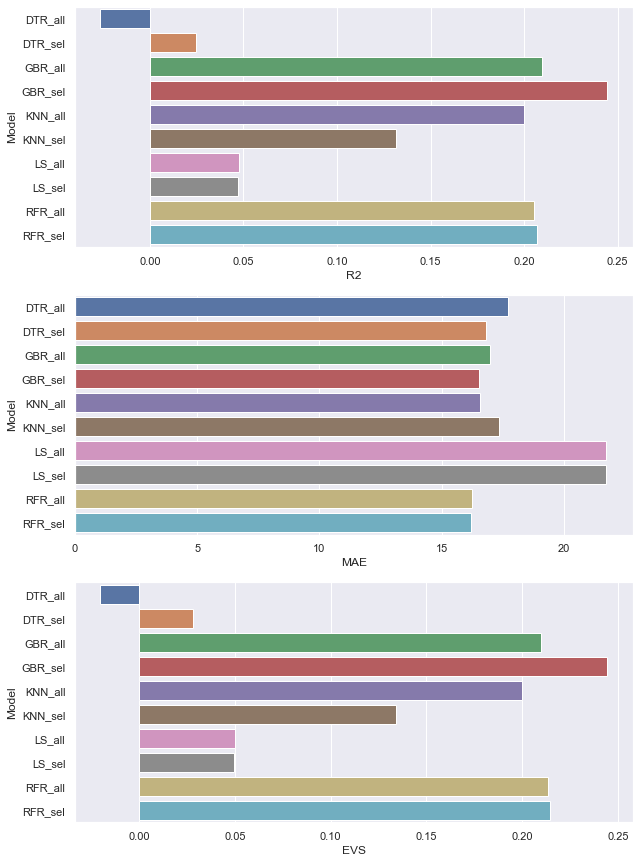

In [62]:
sns.set(style="whitegrid")
i = 1
for col in dfReport.drop(columns=['Model']):
    sns.set(rc={'figure.figsize':(10,15)})
    plt.subplot(3, 1, i)
    sns.barplot(x=col, y="Model", data=dfReport)
    i += 1